In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df = pd.read_excel("C:/Users/agamb/Desktop/premium preidction/dataset/Premium_rest.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [30]:
df.shape

(29904, 13)

In [31]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [32]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [35]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [36]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [37]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [38]:
df[df['number_of_dependants'] < 0]['number_of_dependants'].unique()

array([-1, -3])

In [39]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

### Numeric Columns

In [40]:
numeric_cols = df.select_dtypes(['float64','int64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

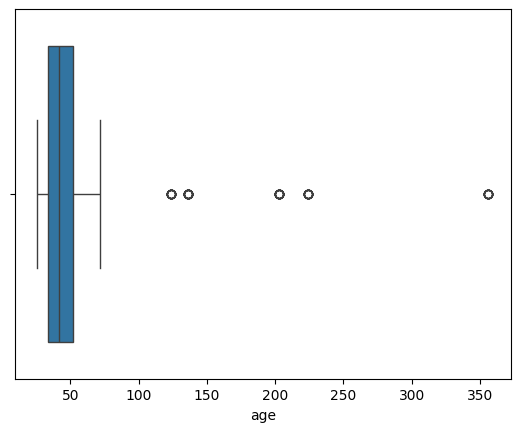

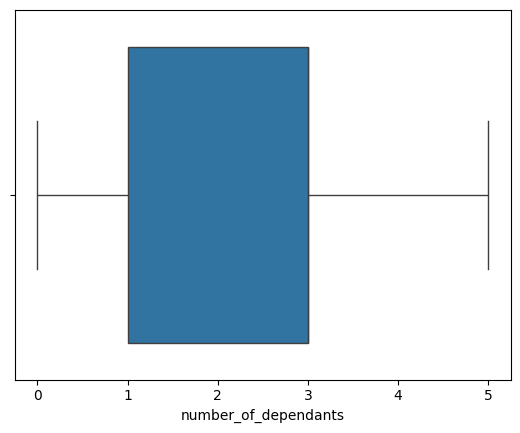

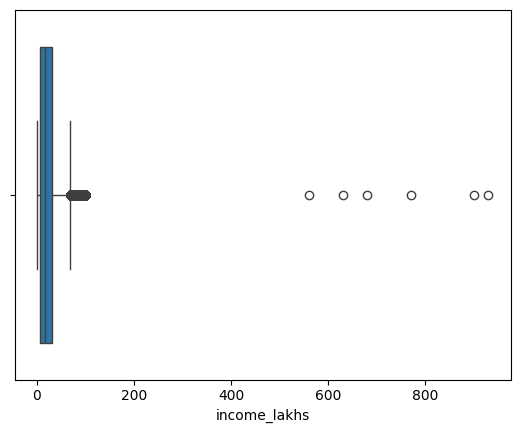

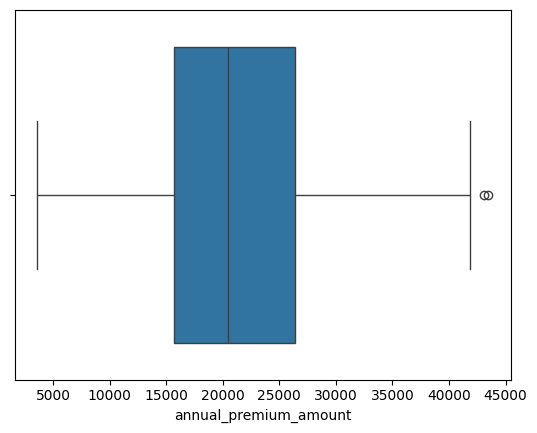

In [41]:
for col in numeric_cols:
  sns.boxplot(x=df[col])
  plt.show()

In [42]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [43]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.387790,23.371530,20901.900563
std,11.041991,1.420641,24.751262,6928.457636
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


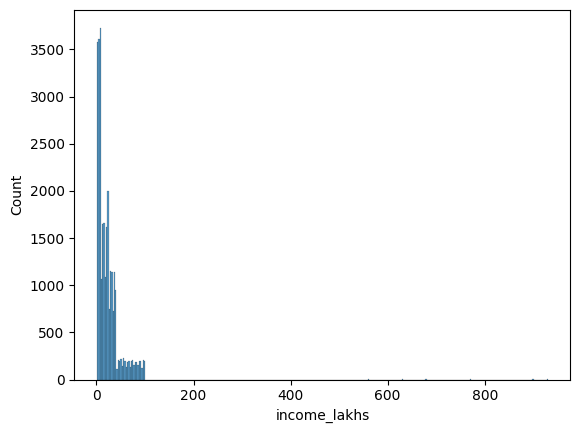

In [44]:
sns.histplot(df1.income_lakhs)
plt.show()

In [45]:
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR
  return upper_bound, lower_bound

In [46]:
get_iqr_bounds(df1.income_lakhs)

(44.5, -30.5)

In [47]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [48]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,23.226343,20900.689223
std,11.042430,1.420644,22.455408,6928.192115
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15705.250000
50%,42.000000,3.000000,17.000000,20495.500000
75%,52.000000,3.000000,32.000000,26360.000000
max,72.000000,5.000000,100.000000,43471.000000


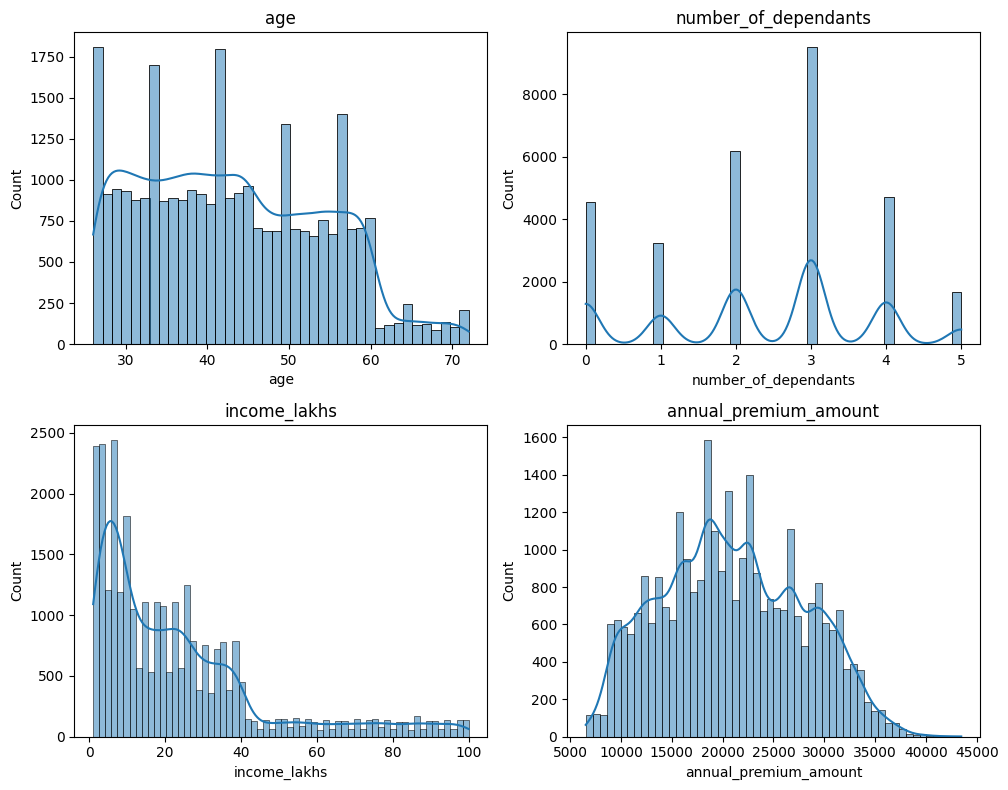

In [49]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
for i, column in enumerate(numeric_cols):
  ax = axs[i//2, i%2]
  sns.histplot(df2[column], kde=True,ax=ax)
  ax.set_title(column)
  
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

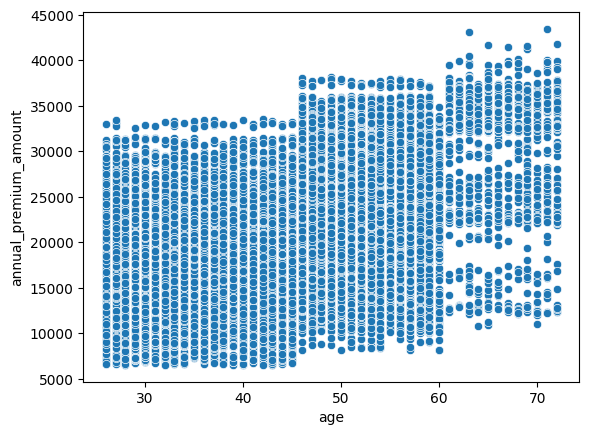

In [50]:
sns.scatterplot(df2, x='age',y='annual_premium_amount')

In [51]:
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

### Working on categorical columns now

In [52]:
for col in categorical_cols:
  print(col, ";", df2[col].unique())

gender ; ['Male' 'Female']
region ; ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ; ['Unmarried' 'Married']
bmi_category ; ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ; ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status ; ['Salaried' 'Self-Employed' 'Freelancer']
income_level ; ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ; ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ; ['Bronze' 'Silver' 'Gold']


In [53]:
df2['smoking_status'].replace({
  'Smoking=0': 'No Smoking',
  'Does Not Smoke': 'No Smoking',
  'Not Smoking': 'No Smoking'
},inplace=True)
df2['smoking_status'].unique()

C:\Users\agamb\AppData\Local\Temp\ipykernel_15144\3352917957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [54]:
pct_count = df2['gender'].value_counts(normalize=True)
pct_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

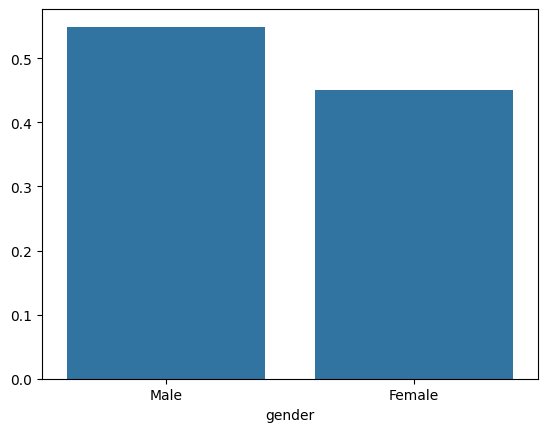

In [55]:
sns.barplot(x=pct_count.index,y=pct_count.values)

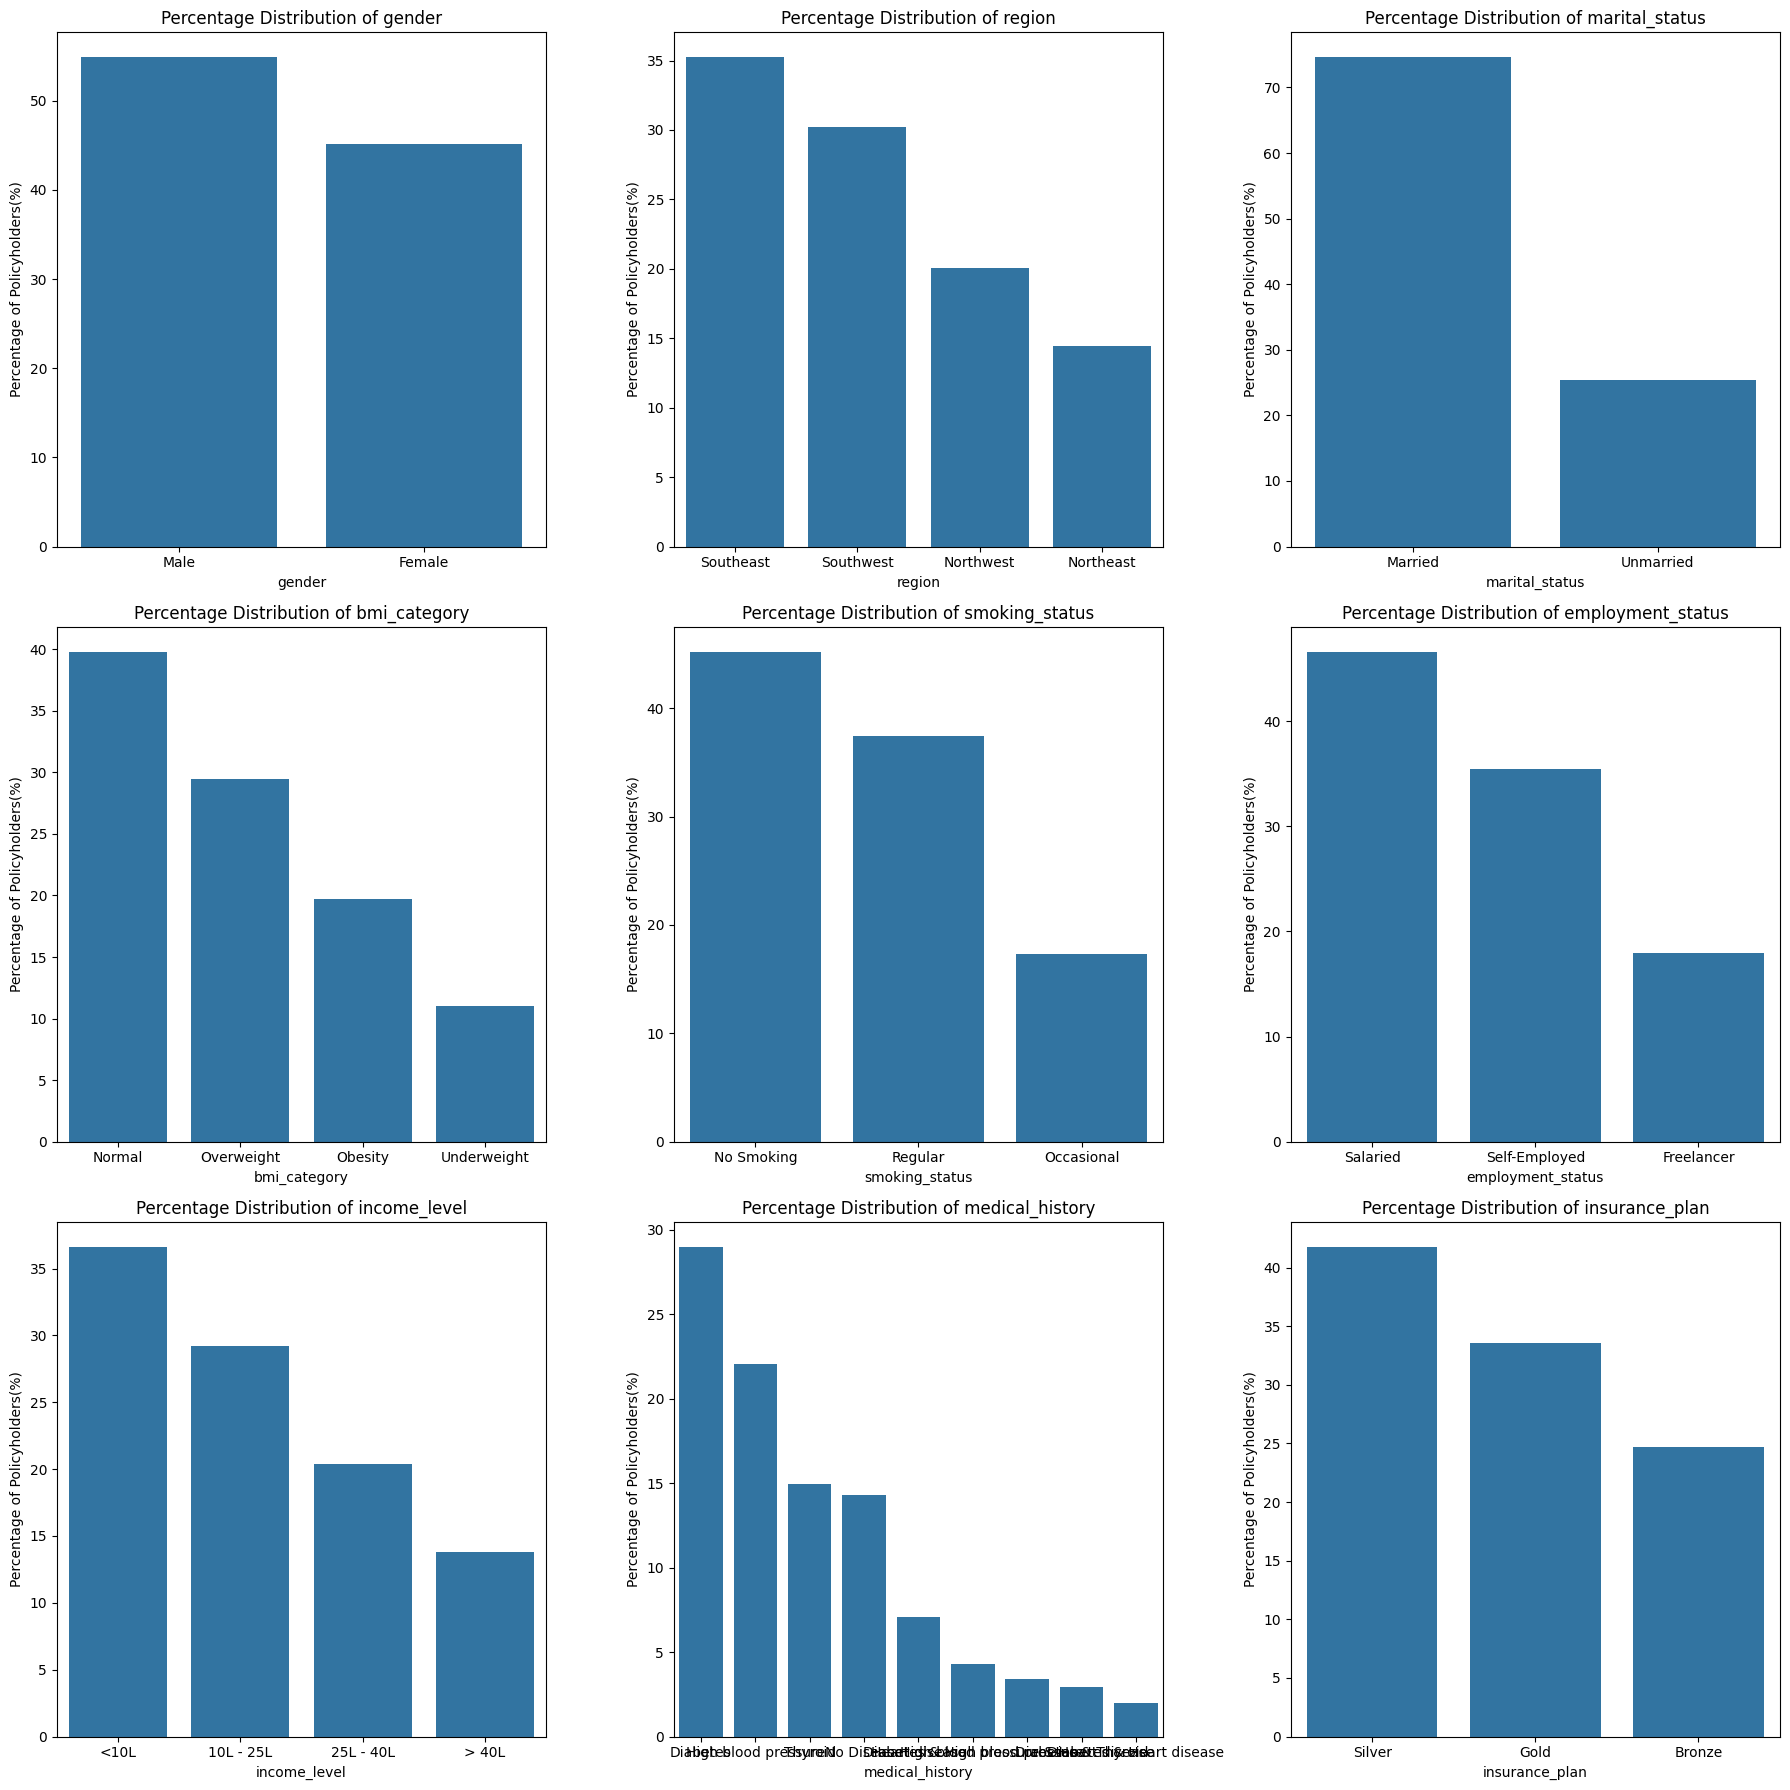

In [56]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()
for ax , column in zip(axes, categorical_cols):
  category_counts = df2[column].value_counts(normalize=True)*100

  sns.barplot(x=category_counts.index, y=category_counts.values,ax=ax)
  ax.set_title(f'Percentage Distribution of {column}')
  ax.set_ylabel(f'Percentage of Policyholders(%)')
  ax.set_xlabel(column)

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


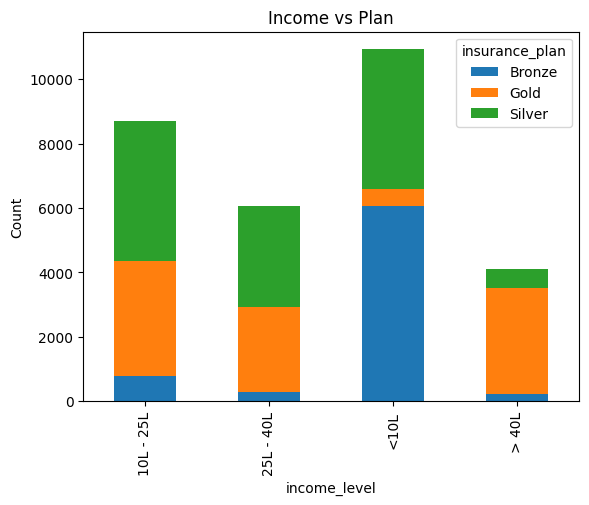

In [57]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

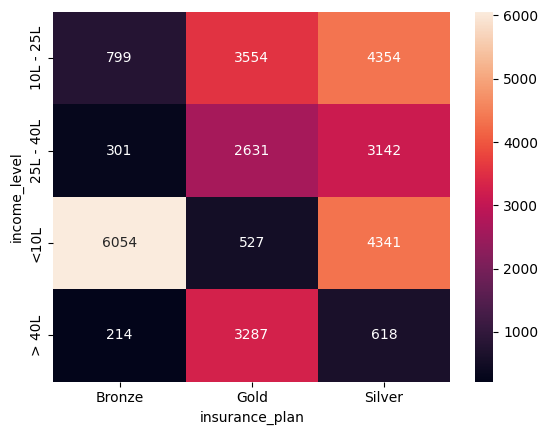

In [58]:
sns.heatmap(crosstab, annot=True,fmt='d')

### Feature engineering

In [59]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [60]:
risk_scores = {
  'diabetes' : 6,
  'heart disease' : 8,
  'high blood pressure' : 6,
  'thyroid' : 5,
  'no disease' : 0,
  'none' : 0
}
df2[['disease1','disease2']] = df2['medical_history'].str.split(" & ",expand=True).apply(lambda x : x.str.lower())

In [61]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
  df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

C:\Users\agamb\AppData\Local\Temp\ipykernel_15144\4207662332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\agamb\AppData\Local\Temp\ipykernel_15144\4207662332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['income_level'] = le.fit_transform(df2['income_level'])
df2['income_level'].unique()

array([2, 0, 3, 1])

#### as label encoder works alphabetically 
#### 10L - 25L : 0 ,25L - 40L : 1 <10L : 2 , >40L : 3

In [63]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,2,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,2,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,0,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,0,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [64]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2['insurance_plan'].unique()

array([1, 2, 3])

In [65]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,2,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,2,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,0,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3,77,No Disease,3,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,0,14,Diabetes,1,15610,diabetes,none,6,0.428571


In [66]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,2,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,2,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,0,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,56,3,0,14,Diabetes,1,15610,diabetes,none,6,...,0,0,0,1,0,0,1,0,0,1


In [67]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,2,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,2,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,0,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,0,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


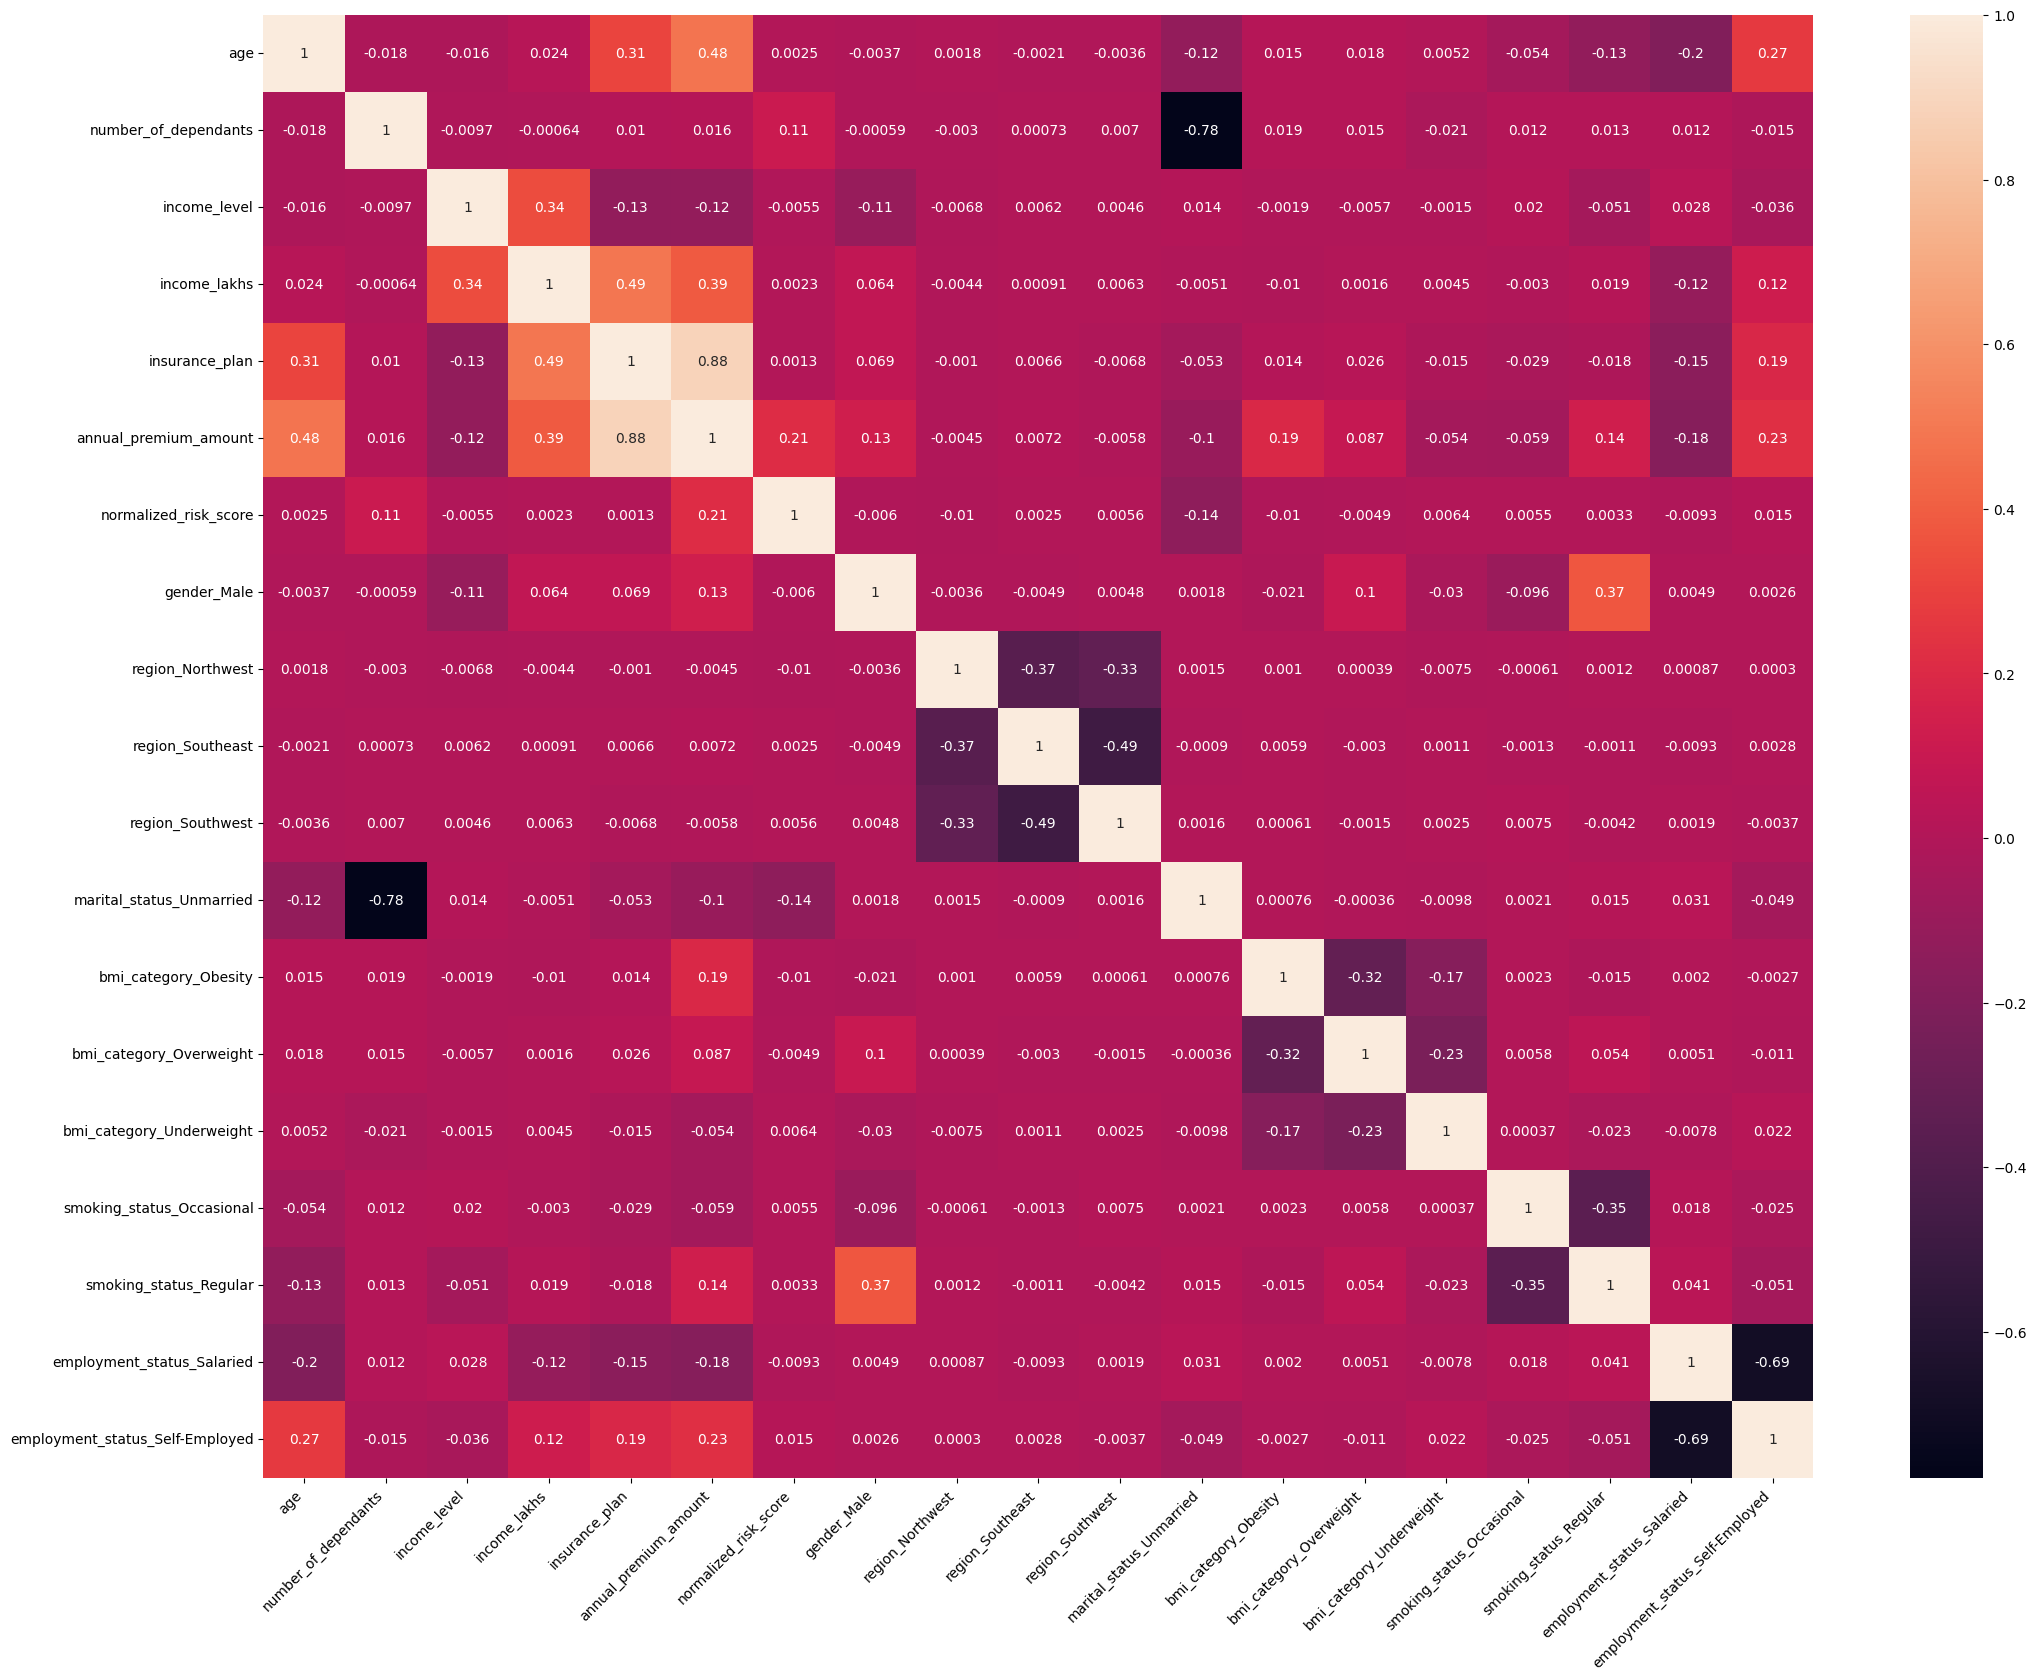

In [68]:
cm = df4.corr()
plt.figure(figsize=(25,19))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [69]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.450171,0.224509,0.544112,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.347668,0.226822,0.379009,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.666667,0.161616,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df = pd.DataFrame()
  vif_df['column'] = data.columns
  vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif_df

In [71]:
calculate_vif(X)

,column,VIF
0,age,4.024640
1,number_of_dependants,6.501233
2,income_level,3.380304
3,income_lakhs,3.511889
4,insurance_plan,5.184870
5,normalized_risk_score,3.829814
6,gender_Male,2.609627
7,region_Northwest,2.138485
8,region_Southeast,3.011418
9,region_Southwest,2.732252


In [72]:
calculate_vif(X.drop('income_level',axis='columns'))

,column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,normalized_risk_score,3.808345
5,gender_Male,2.591439
6,region_Northwest,2.123277
7,region_Southeast,2.979899
8,region_Southwest,2.708641
9,marital_status_Unmarried,2.345757


In [73]:
X_reduced = X.drop('income_level',axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


### Model Training

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [75]:
Model = LinearRegression()
Model.fit(X_train,y_train)
train_score = Model.score(X_train,y_train)
test_score = Model.score(X_test,y_test)

In [76]:
y_pred = Model.predict(X_test)

mse_lr  = mean_squared_error(y_test,y_pred)
rsme_lr = np.sqrt(mse_lr)
print("XGBoost ==> MSED : ",mse_lr, "RSME : ", rsme_lr)

XGBoost ==> MSED :  2183844.3603124553 RSME :  1477.783597253825


In [77]:
train_score,test_score

(0.9534163989489616, 0.9538448451629948)

In [78]:
Model.coef_

array([ 7016.23932829, -1311.76470171,  -708.19336921, 14835.98820801,
        6053.6241234 ,    37.55826883,   -55.25087215,   -19.62254288,
         -22.28967559,  -700.32019985,  3926.8127061 ,  1979.45604663,
         612.86623617,   837.3951011 ,  2800.66184334,   -45.49136706,
         243.07842087])

In [79]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

                                 Coefficients
number_of_dependants             -1311.764702
income_lakhs                      -708.193369
marital_status_Unmarried          -700.320200
region_Northwest                   -55.250872
employment_status_Salaried         -45.491367
region_Southwest                   -22.289676
region_Southeast                   -19.622543
gender_Male                         37.558269
employment_status_Self-Employed    243.078421
bmi_category_Underweight           612.866236
smoking_status_Occasional          837.395101
bmi_category_Overweight           1979.456047
smoking_status_Regular            2800.661843
bmi_category_Obesity              3926.812706
normalized_risk_score             6053.624123
age                               7016.239328
insurance_plan                   14835.988208


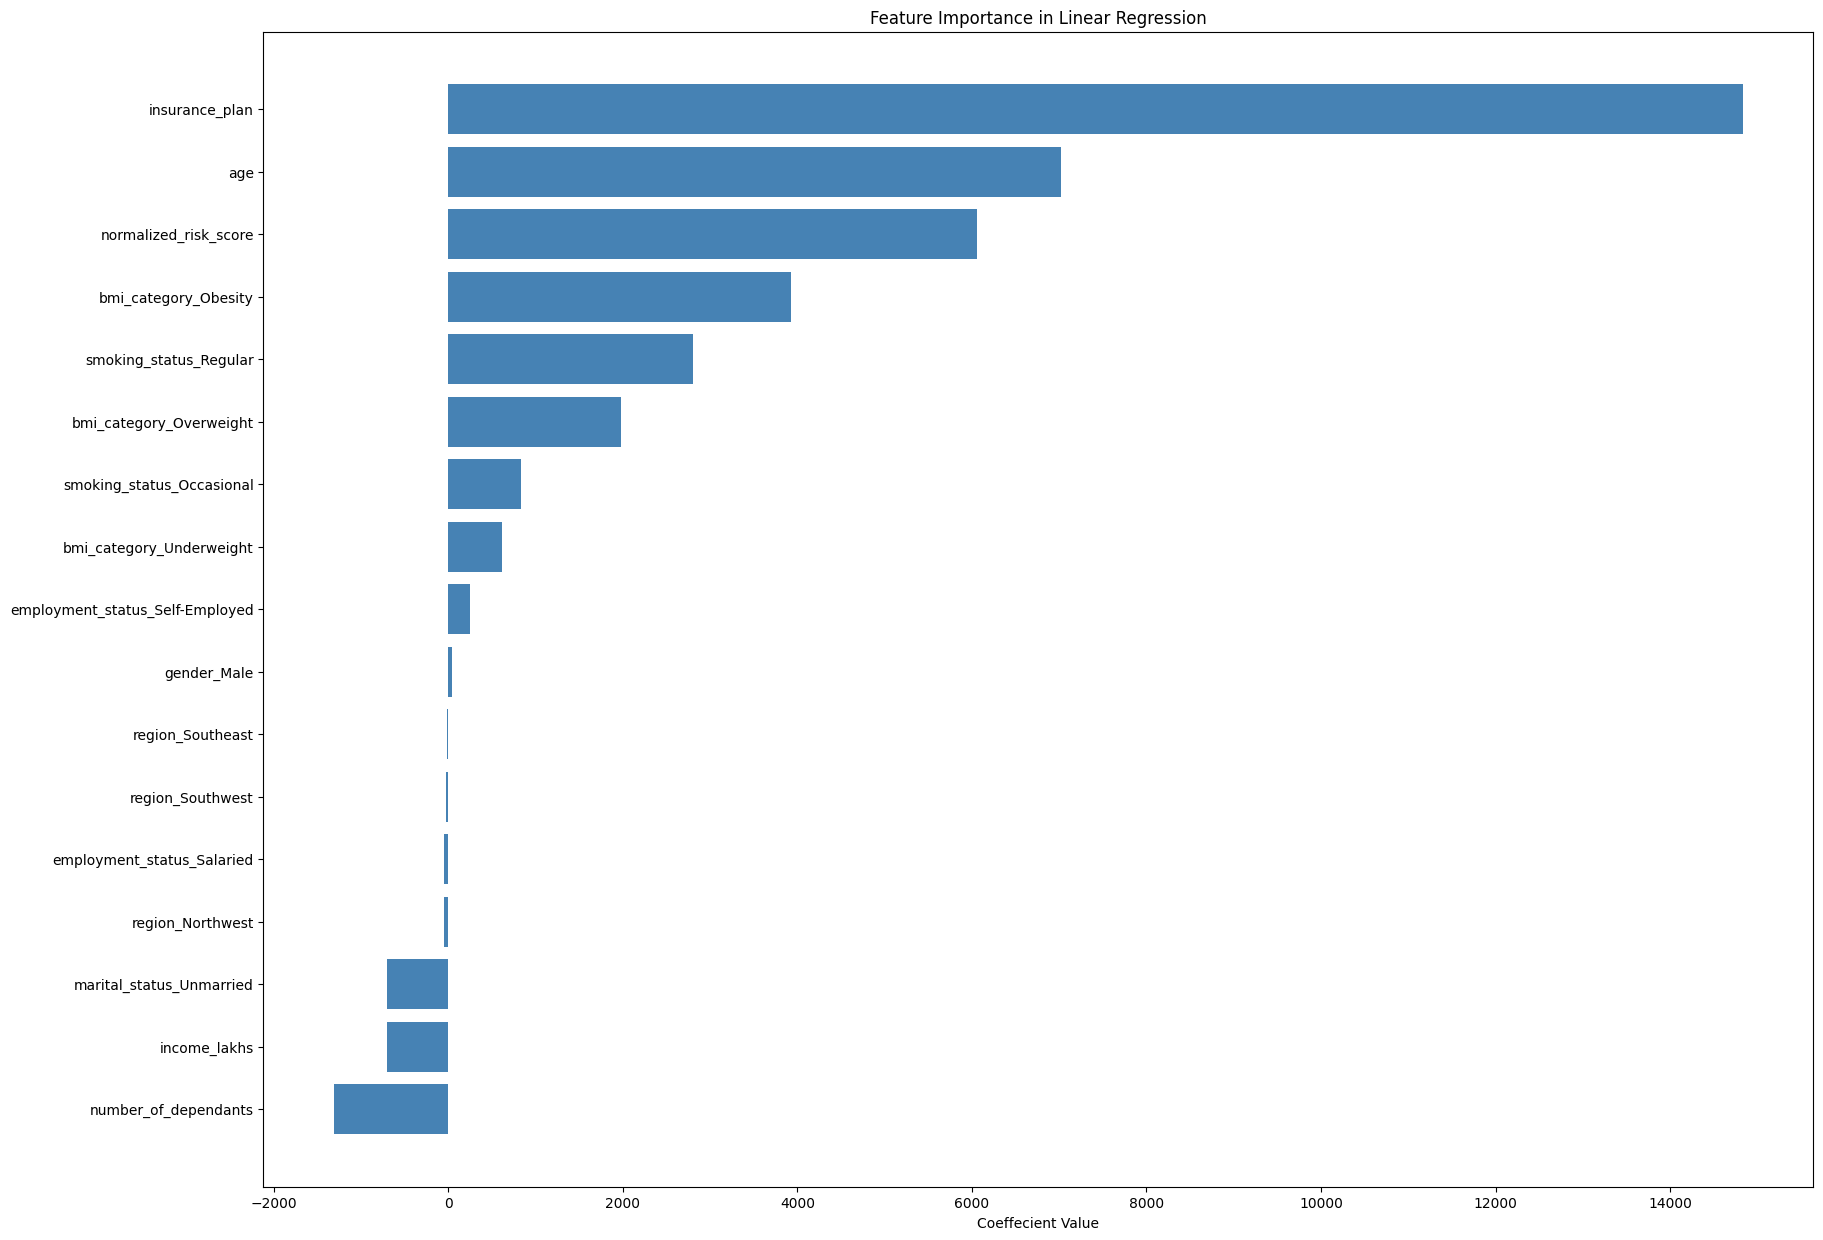

In [80]:
feature_importances = Model.coef_
coef_df = pd.DataFrame(feature_importances,index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
print(coef_df)
plt.figure(figsize=(20,15))
plt.barh(coef_df.index,coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coeffecient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)

### Ridge Model

In [82]:
Model_ridge = Ridge()
Model_ridge.fit(X_train,y_train)
train_score_ridge = Model_ridge.score(X_train,y_train)
test_score_ridge = Model_ridge.score(X_test,y_test)

In [83]:
train_score_ridge,test_score_ridge

(0.9534162332209687, 0.9538456995663842)

In [84]:
from xgboost import XGBRegressor

Model_boost = XGBRegressor()
Model_boost.fit(X_train,y_train)
train_score_boost = Model_boost.score(X_train,y_train)
test_score_boost = Model_boost.score(X_test,y_test)

In [85]:
train_score_boost,test_score_boost

(0.9986370801925659, 0.9979538321495056)

In [86]:
y_pred = Model_boost.predict(X_test)

mse_boost  = mean_squared_error(y_test,y_pred)
rsme_boost = np.sqrt(mse_boost)
print("XGBoost ==> MSED : ",mse_boost, "RSME : ", rsme_boost)

XGBoost ==> MSED :  96814.2109375 RSME :  311.14982072548264


In [87]:
Model_boost = XGBRegressor()
param_grid = {
  'n_estimators' : [20,40,50],
  'learning_rate' : [0.01,0.1,0.2],
  'max_depth' : [3,4,5]
}
random_search = RandomizedSearchCV(Model_boost,param_grid,n_iter=10,cv=3,scoring='r2',random_state=10)
random_search.fit(X_train,y_train)
random_search.best_score_

np.float64(0.9954523245493571)

In [88]:
random_search.best_params_

{'n_estimators': 20, 'max_depth': 5, 'learning_rate': 0.2}

In [89]:
best_model = random_search.best_estimator_

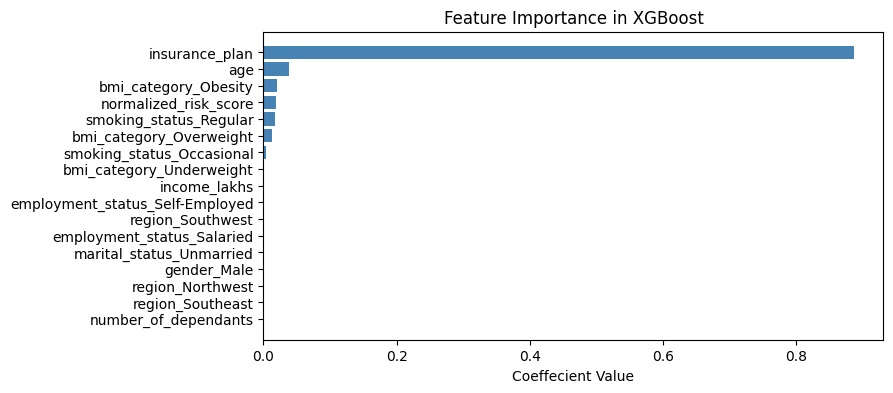

In [90]:
feature_importances = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances,index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coeffecient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### ERROR ANALYSIS

In [91]:
y_pred = best_model.predict(X_test)
residuals = y_pred-y_test
residuals_pct = residuals*100/y_test
results_df = pd.DataFrame({
  'actual' : y_test,
  'prediction' : y_pred,
  'diff' : residuals,
  'diff_pct' : residuals_pct
})
print(results_df.head())

       actual    prediction        diff  diff_pct
19713   26895  26734.671875 -160.328125 -0.596126
14750   22734  22464.447266 -269.552734 -1.185681
19932   21198  21550.511719  352.511719  1.662948
29643    9100   9600.375000  500.375000  5.498626
17076   26434  26734.671875  300.671875  1.137444


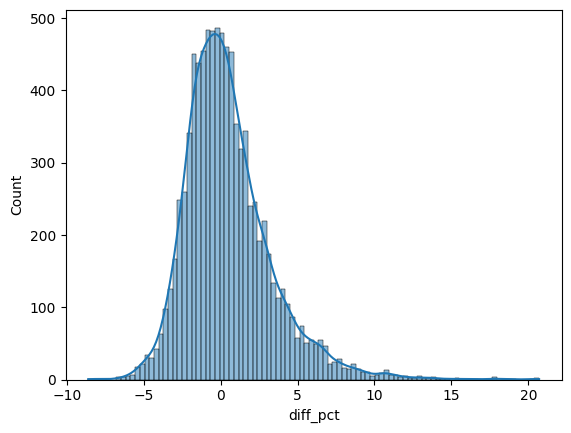

In [92]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [93]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(83, 4)

In [94]:
results_df.shape

(8947, 4)

In [95]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.9276852576282553

In [96]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,prediction,diff,diff_pct


In [97]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10731,0.391304,0.8,0.20202,0.5,0.000000,0,0,0,1,0,0,0,0,0,0,0,1
9227,0.217391,0.6,0.00000,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


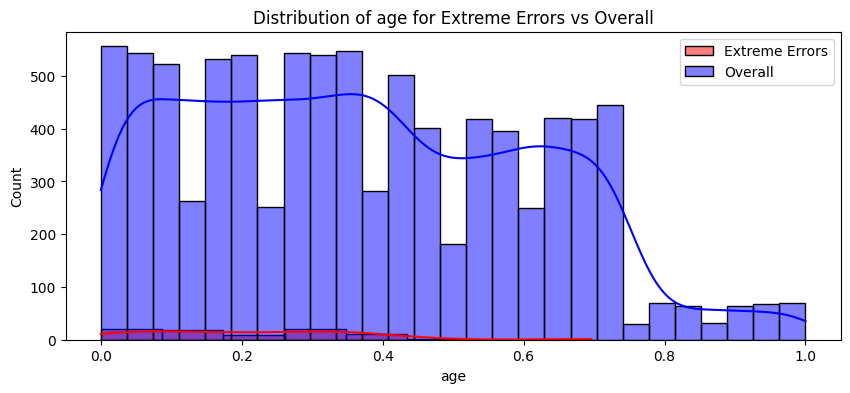

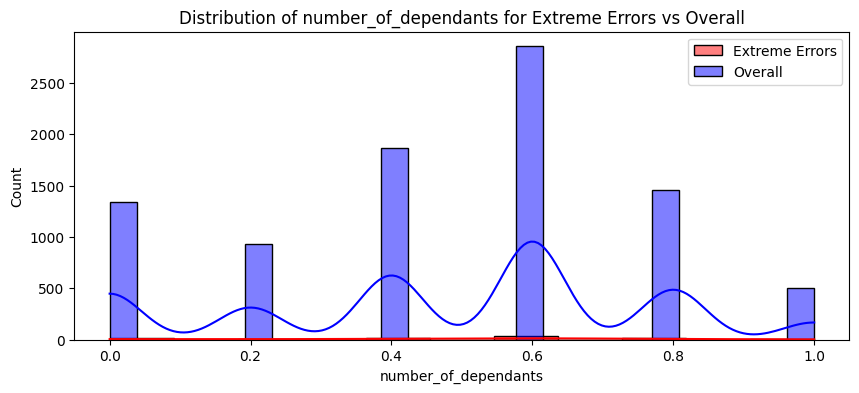

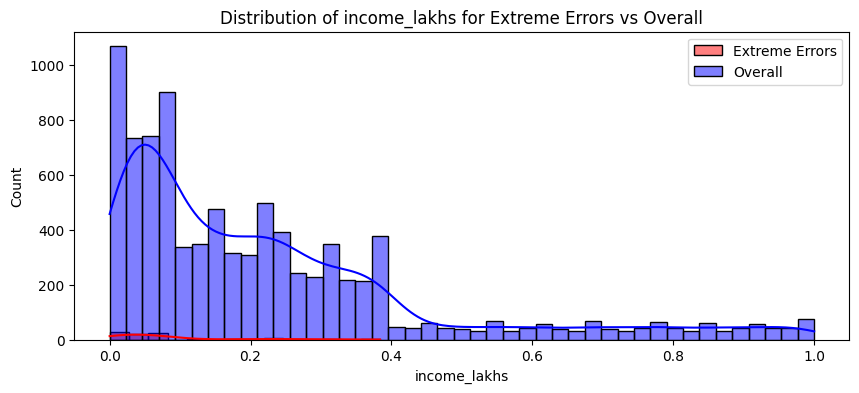

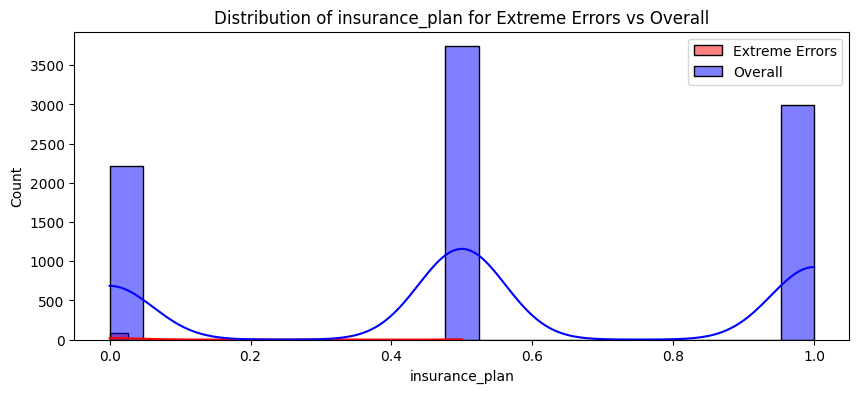

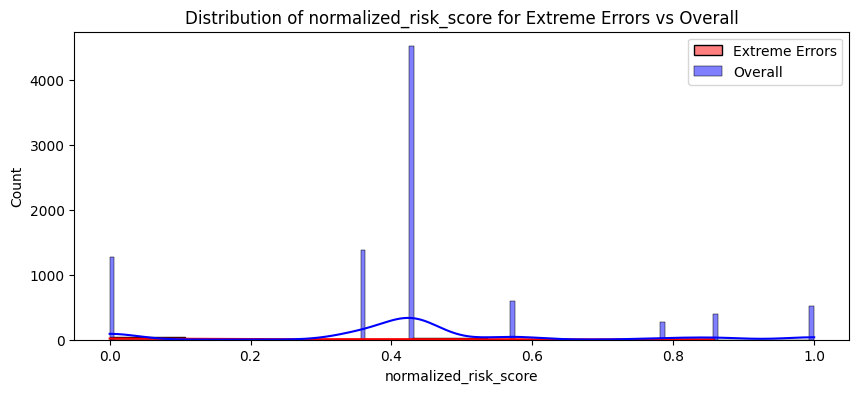

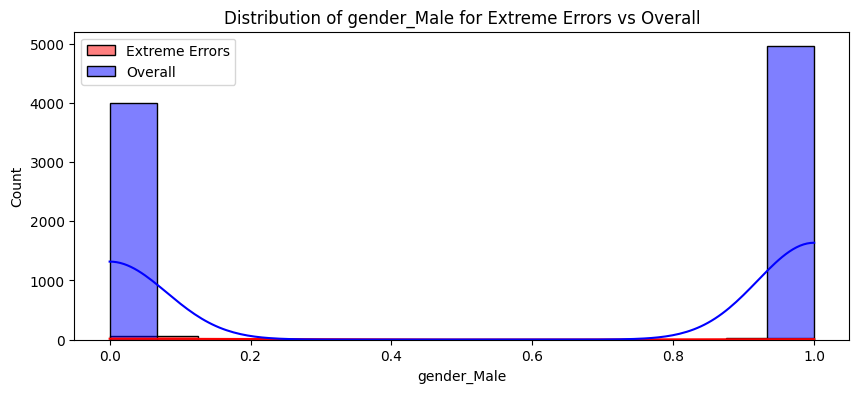

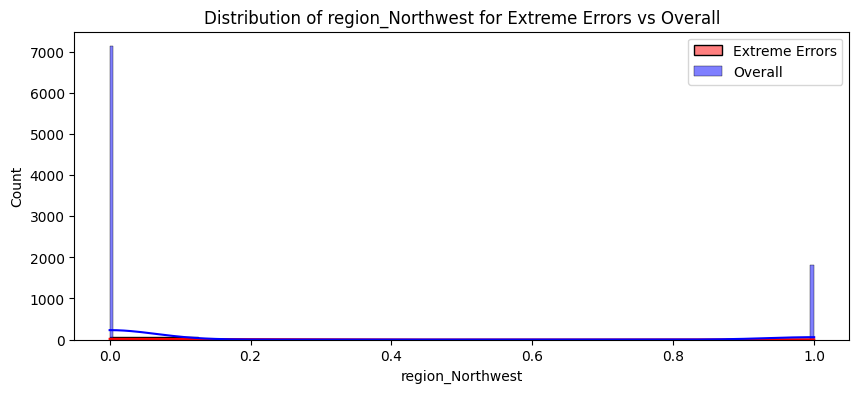

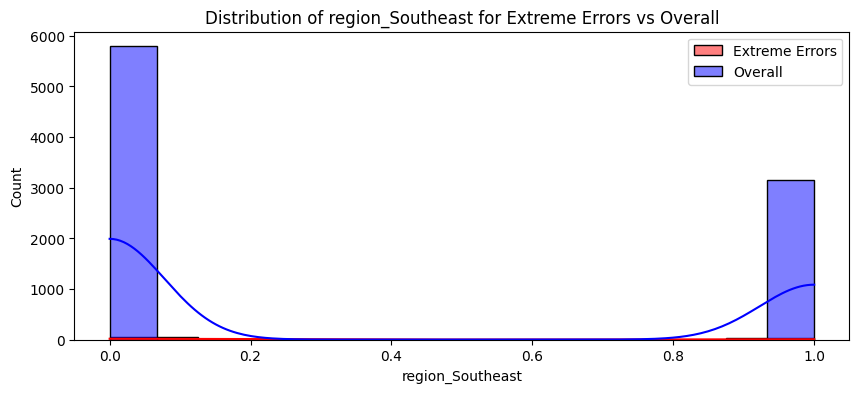

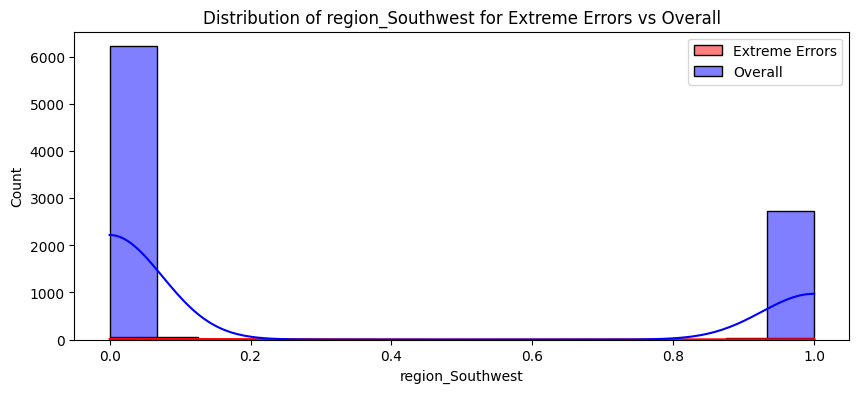

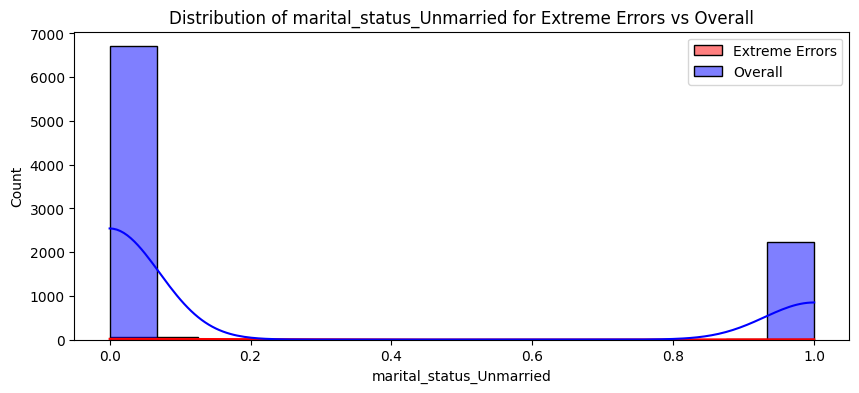

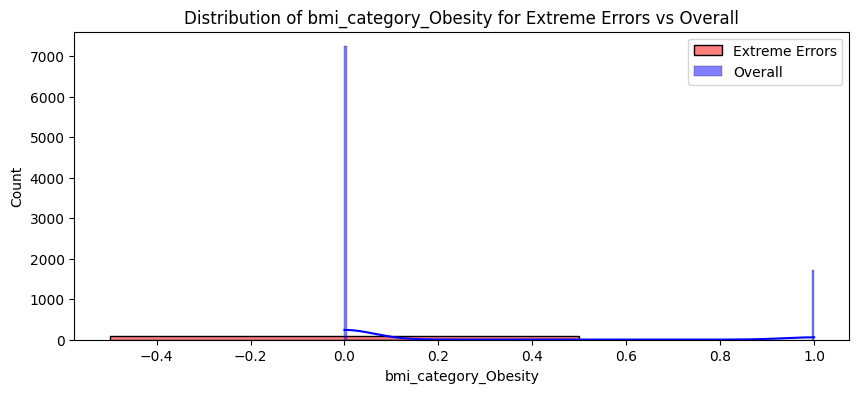

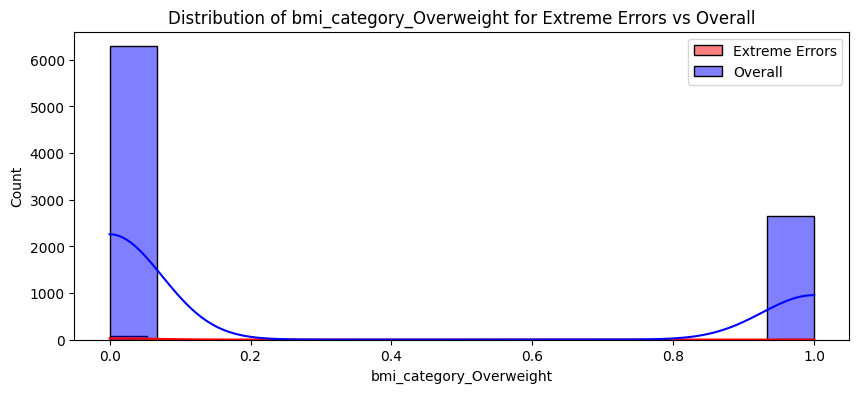

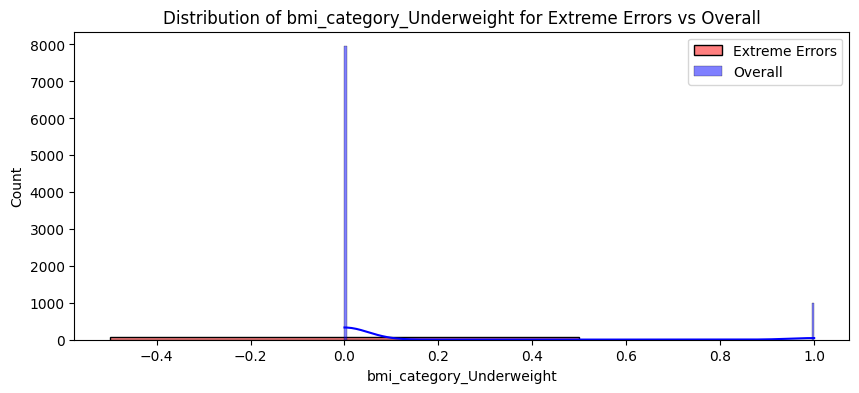

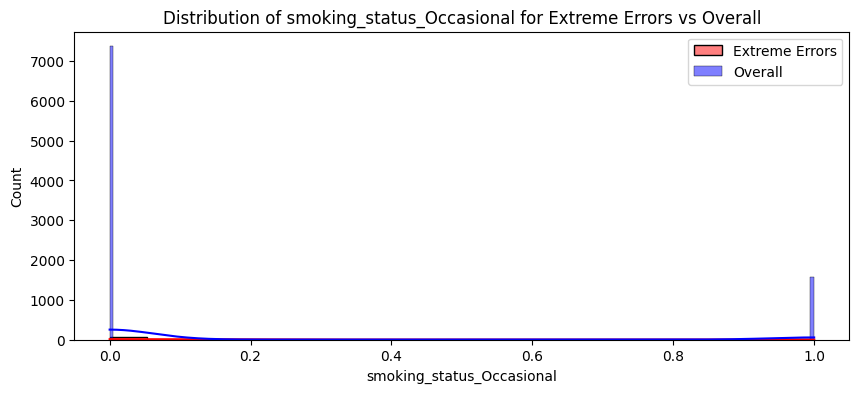

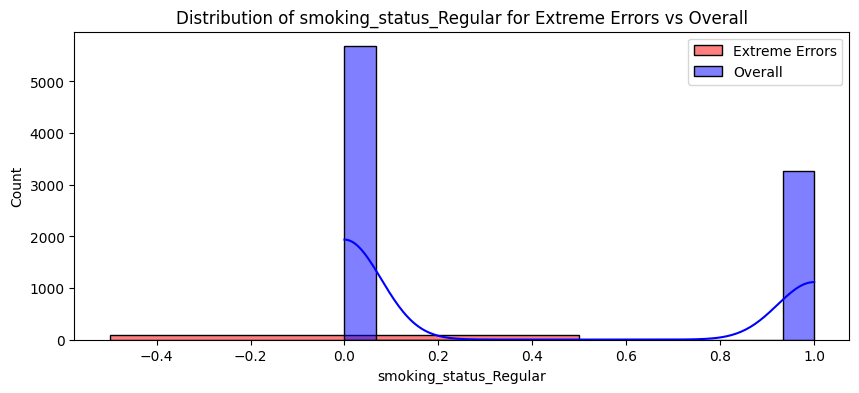

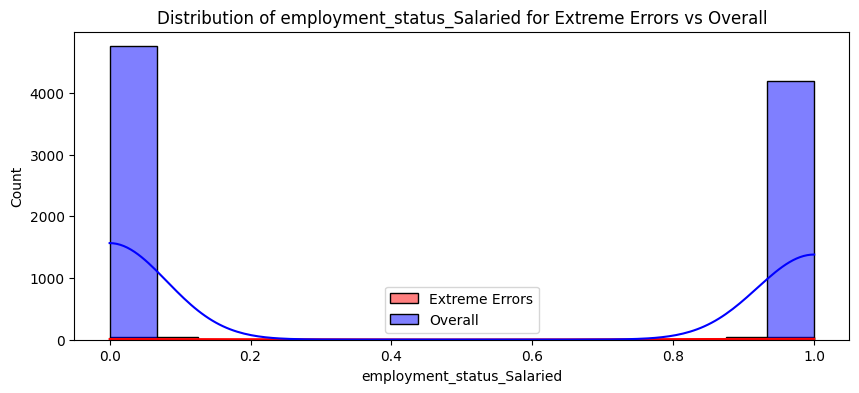

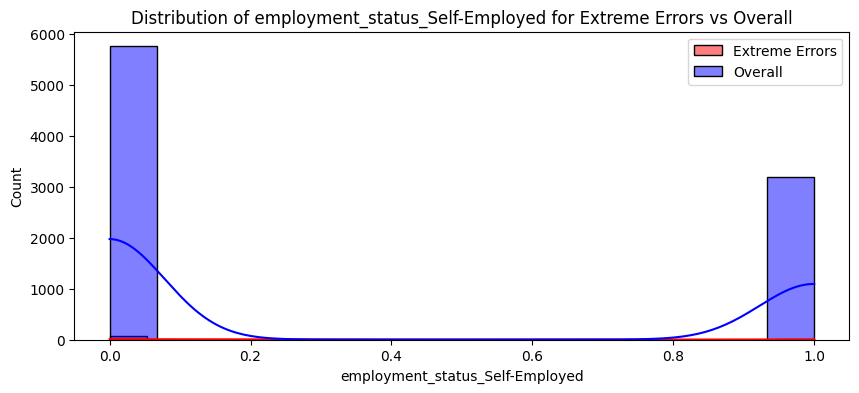

In [98]:
for feature in X_test.columns:
  plt.figure(figsize=(10, 4))
  sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
  sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
  plt.legend()
  plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
  plt.show()

### Reverse Scaling

In [99]:
extreme_errors_df['income_level']=-1

In [100]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,44.0,4.0,-3.0,21.0,2.0
1,36.0,3.0,-3.0,1.0,1.0
2,36.0,3.0,-3.0,8.0,1.0
3,30.0,2.0,-3.0,2.0,1.0
4,44.0,2.0,-3.0,7.0,1.0


In [101]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,83.000000,83.000000,83.0,83.000000,83.000000
mean,35.698795,2.409639,-3.0,7.578313,1.048193
std,6.941805,1.388420,0.0,7.566164,0.215475
min,26.000000,0.000000,-3.0,1.000000,1.000000
25%,29.500000,2.000000,-3.0,3.000000,1.000000
50%,36.000000,3.000000,-3.0,6.000000,1.000000
75%,41.000000,3.000000,-3.0,9.000000,1.000000
max,58.000000,5.000000,-3.0,39.000000,2.000000


<Axes: xlabel='age', ylabel='Count'>

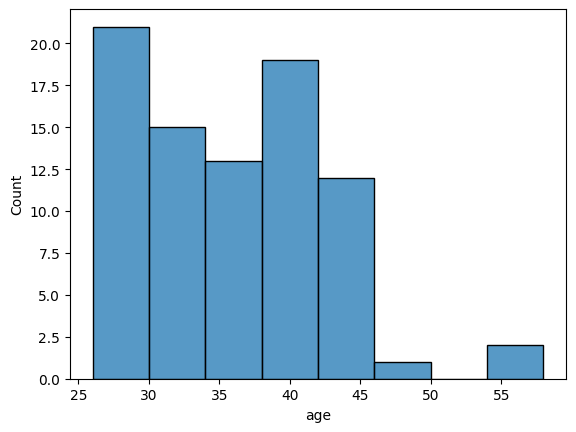

In [102]:
sns.histplot(df_reversed.age)

This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment"